## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Machine Learning
## Elaborado por:

# André Proença 2016018783

# Isabel Castro 2018013160

## DATA SET ORIGINAL
## [https://archive.ics.uci.edu/ml/datasets/Bank+Marketing](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [419]:
import seaborn as sea
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import string
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

## Used functions

In [420]:
def randcolor(number):
    lista = []
    for i in range(number):
        color = "%06x" % random.randint(0, 0xFFFFFF)
        lista.append(color)
    return lista

In [421]:
def plotFigureBoxPlot(columnName,dataset):
    plt.figure(figsize=(6,9))
    sea.boxplot(x=columnName, data=dataset, color='green')
    plt.title("Boxplot of {}" .format(columnName),size=20,color="red")
    plt.xlabel("{}".format(columnName),size=15)

In [422]:
def numericAnalysis(columnName, dataframe):
    item = dataframe[columnName]

    print("Mean:\t", item.mean())
    print("Mode:\t", item.mode())
    print("Median:\t", item.median())
    print("Variance:\t", item.var())
    print("Std deviation:\t", item.std())
    print("Percentils (25, 50, 75):\t", item.quantile([0, 0.25, 0.5, 0.75, 1]))

In [423]:
def plotBarChart(dataset, columnName):
    sea.set(style='whitegrid', palette="bright", font_scale=1.1, rc={"figure.figsize": [15, 10]})
    if(dataset[columnName].dtype != 'object'):
        sea.histplot(x=columnName, data=dataset, bins=np.arange(0, 100, 5), kde=True)
    else:
        sea.histplot(x=columnName, data=dataset, bins=np.arange(0, 100, 5))
    plt.title(string.capwords(columnName) + " " + "distribution")

In [424]:
def plotPieChart(data, labels, title, color=None):
    
    
    fig1, ax1 = plt.subplots()
    if (color == None):
        plt.style.use('seaborn-pastel')
    ax1.pie(data,
            labels=labels,
            autopct="%.1f%%",
            startangle=90,
            colors=color,
            pctdistance=0.85)

    fig = plt.gcf()
    ax1.axis('equal')
    plt.tight_layout()
    plt.title(title)

In [425]:
def plotBarChartByAgeRange(dataset, columnName, label, title):
    ageRange = list(range(15, 95, 5))

    plt.figure(figsize=(18, 25))
    plt.subplot(3, 2, 1)
    dataset.groupby(pd.cut(dataset.age, ageRange))[columnName].mean().plot.bar()
    plt.ylabel(label)
    plt.title(title)


In [426]:
def metricas(ytest,y_pred):
    print("Accucary:")

## Dataset reading

In [427]:
fullDataset = pd.read_csv('bank-full.csv', sep=';')

### Resampling Imbalanced Dataset

## Features Analysis

### Find the numeric outliers so that we can drop them when we get there

### Age

### Balance

In [428]:
# VAMOS DAR DROP A TODAS AS LINHAS COM BALANCE NEGATIVO E VAMOS TAMBEM DAR DROP A LINHAS COM BALANCE MUITO ALTOS
fullDataset.drop(fullDataset[(fullDataset['balance']>40000)|(fullDataset['balance']<0)].index,inplace=True,axis=0)

# Remover outliers da duration apos analise do boxplot

In [429]:
#Remove data where duration is bigger than 2500
fullDataset.drop(fullDataset[fullDataset['duration']>2500].index,inplace=True,axis=0)

### Campaign

# Remover outliers da campaign apos analise do boxplot

In [430]:
#Remove data where campaign is bigger than 35
fullDataset.drop(fullDataset[fullDataset['campaign']>35].index,axis=0,inplace=True)

### Pdays

##Remover outlier pdays

In [431]:
#Remove all pdays data
fullDataset.drop("pdays",inplace=True,axis=1)

### Previous

# Remover outliers previous apos analise do boxplot

In [432]:
#Remove all data where previous is bigger than 30
fullDataset.drop(fullDataset[fullDataset['previous']>30].index,axis=0,inplace=True)

In [433]:
X = fullDataset.drop('y',axis=1)
Y = fullDataset['y']

xData,xdataa,yData,ydataa = train_test_split(X,Y,train_size=0.22,stratify=Y)

yData=pd.DataFrame(yData,columns=['y'])
dataset = xData

## Stratified sampling


In [434]:

# Divide dataset between features e target


# Test and train must have similar loans value

dataset['binary'] = dataset['loan'].astype(str) + dataset['default'].astype(str)

x_train_set, x_test_set , y_train_set, y_test_set  = train_test_split(dataset,yData,train_size=0.8, random_state=0, stratify=dataset[['binary']])

# Remove binary column because it was only an aux for the split
x_train_set = x_train_set.drop("binary",axis=1)
x_test_set = x_test_set.drop("binary",axis=1)

## Enconding categorical data

### Pipeline

In [435]:
num_cat = ['age','balance','day','campaign','previous','duration']
ordinal_cat = ['month','contact','poutcome']
one_hot_cat = ['job','marital','education','default','housing','loan']

num_pipe = Pipeline([('scaler',StandardScaler())])

categorical_transformer = Pipeline([('onehot',OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary'))])

cat_pipe_ordinal = Pipeline([('ordinal_encoder',OrdinalEncoder())])

preprocessor = ColumnTransformer([('num_enc',num_pipe,num_cat),('cat_enc',categorical_transformer,one_hot_cat),('ord_enc',cat_pipe_ordinal,ordinal_cat)])

x_train_set = preprocessor.fit_transform(x_train_set)
x_test_set = preprocessor.fit_transform(x_test_set)

### Without pipeline

In [436]:
#Binary Encoding

list_bin = ['default','housing','loan']
for i in list_bin:
    dataset[i] = LabelBinarizer().fit_transform(dataset[i].values)

#Ordinal Encoding

list_ordinal=['month','contact','poutcome']
for i in list_ordinal:
    dataset[i]=LabelEncoder().fit_transform(dataset[i].values)

# Dummy Encoding

dataset = pd.get_dummies(dataset, columns= ['job','marital','education'])

# Reset Index and check dataset again

dataset = dataset.reset_index()
dataset.drop('index', axis=1, inplace=True)

dataset['binary'] = dataset['loan'].astype(str) + dataset['default'].astype(str)

x_train_set_np, x_test_set_np , y_train_set_np, y_test_set_np = train_test_split(dataset,yData,test_size=0.2, random_state=0, stratify=dataset[['binary']])

# Binary columns no longer needed
x_train_set_np = x_train_set_np.drop("binary",axis=1)
x_test_set_np = x_test_set_np.drop("binary",axis=1)


#Scaling

ss= StandardScaler()

x_train_set_np_org = ss.fit_transform(x_train_set_np)
x_test_set_np_org = ss.fit_transform(x_test_set_np)

x_train_set_np_sc = ss.fit_transform(x_train_set_np[['age','balance','day','duration','campaign','previous']])
x_test_set_np_sc = ss.transform(x_test_set_np[['age','balance','day','duration','campaign','previous']])


#### META 2 ####

In [437]:
y_train_set['y'] = y_train_set['y'].map({'yes' : 1, 'no': 0})
y_test_set['y'] = y_test_set['y'].map({'yes' : 1 , 'no' : 0})

In [438]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train_set,x_test_set,y_train_set,y_test_set)
models

100%|██████████| 29/29 [00:14<00:00,  1.98it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.82,0.80,0.80,0.84,0.02
GaussianNB,0.85,0.71,0.71,0.86,0.02
XGBClassifier,0.90,0.70,0.70,0.89,0.66
PassiveAggressiveClassifier,0.86,0.70,0.70,0.86,0.03
DecisionTreeClassifier,0.87,0.69,0.69,0.87,0.05
LGBMClassifier,0.89,0.67,0.67,0.88,0.17
BaggingClassifier,0.89,0.67,0.67,0.88,0.24
QuadraticDiscriminantAnalysis,0.75,0.66,0.66,0.79,0.08
AdaBoostClassifier,0.89,0.66,0.66,0.88,0.52


##SUPERVISED##

## LOGISTIC REGRESSION ##

In [439]:
from sklearn.linear_model import LogisticRegression
clflr=LogisticRegression(random_state=0)


## Linear SVM ##

In [440]:
from sklearn import svm
clfsvm = svm.LinearSVC()

## Naive Bayes Gaussian ##

In [441]:
from sklearn.naive_bayes import GaussianNB
clfnb = GaussianNB()

## Naive Bayes MultinomialNB ##

In [442]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
clfmnb = MultinomialNB()

MinMax = MinMaxScaler()

x_train_set_np_nb = MinMax.fit_transform(x_train_set_np[['age','balance','day','campaign','previous','duration']])
x_test_set_np_nb = MinMax.fit_transform(x_test_set_np[['age','balance','day','campaign','previous','duration']])

clfmnb.fit(x_train_set_np_nb,y_train_set_np)
y_predmnb=clfmnb.predict(x_test_set_np_nb)
print("Accuracy:",accuracy_score(y_test_set_np,y_predmnb).round(2))
print("Precision:",precision_score(y_test_set_np,y_predmnb,pos_label='yes').round(2))
print("Recall:",recall_score(y_test_set_np,y_predmnb,pos_label='yes').round(2))
print("F1:",f1_score(y_test_set_np,y_predmnb,pos_label='yes').round(2))
print("Confusion Matrix : \n",confusion_matrix(y_test_set_np,y_predmnb))

Accuracy: 0.89
Precision: 0.0
Recall: 0.0
F1: 0.0
Confusion Matrix : 
 [[1611    0]
 [ 209    0]]


## KNeighbors ##

In [443]:
from sklearn.neighbors import KNeighborsClassifier

clfknn = KNeighborsClassifier()


## Decision Tree ##

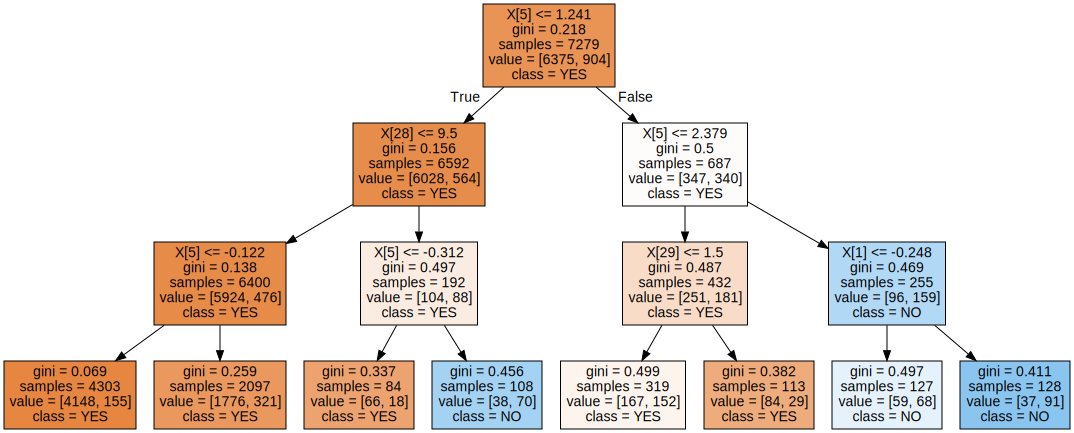

In [444]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

clftree = DecisionTreeClassifier(max_depth=3)
clftree.fit(x_train_set,y_train_set)
y_predtree = clftree.predict(x_test_set)
dot_data = export_graphviz(clftree, class_names=['YES','NO'],filled=True)
graph = graphviz.Source(dot_data)
graph

## Random Forest ##

In [445]:
from sklearn.ensemble import  RandomForestClassifier
clfrf=RandomForestClassifier()


## NeuralNetwork MLP ##

In [446]:
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier()


## Metricas dos Classificadores ##

****************
<class 'sklearn.linear_model._logistic.LogisticRegression'> __main__
Accuracy: 0.89
Precision: 0.55
Recall: 0.21
F1: 0.3


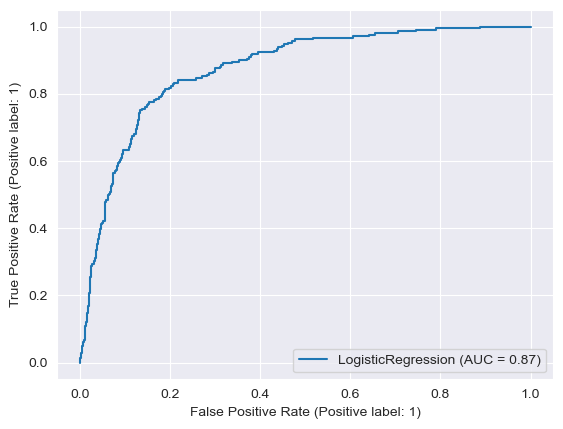

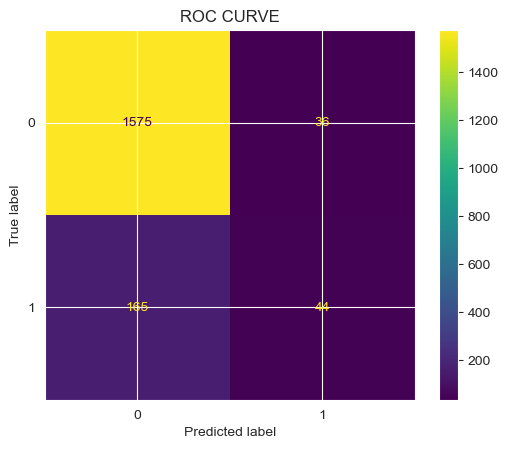

****************
<class 'sklearn.svm._classes.LinearSVC'> __main__
Accuracy: 0.89
Precision: 0.54
Recall: 0.17
F1: 0.26


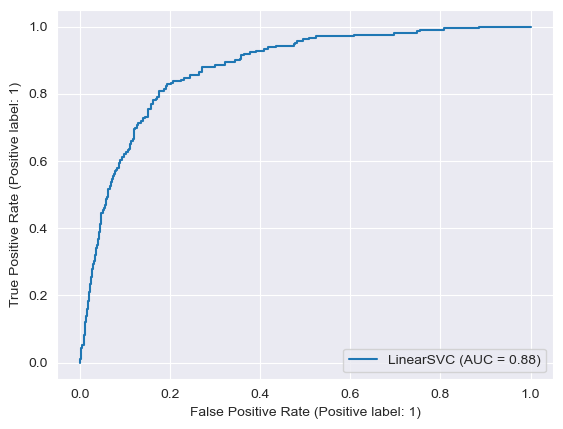

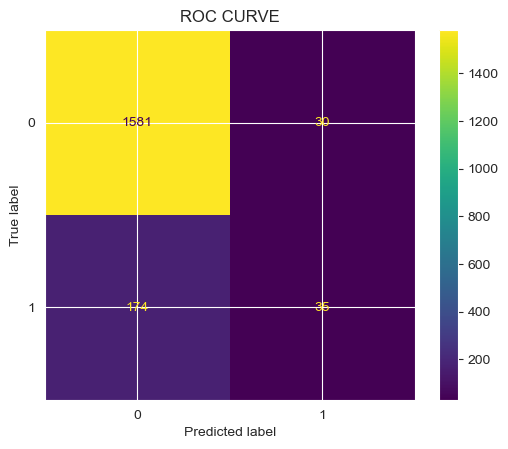

****************
<class 'sklearn.naive_bayes.GaussianNB'> __main__
Accuracy: 0.85
Precision: 0.38
Recall: 0.54
F1: 0.45


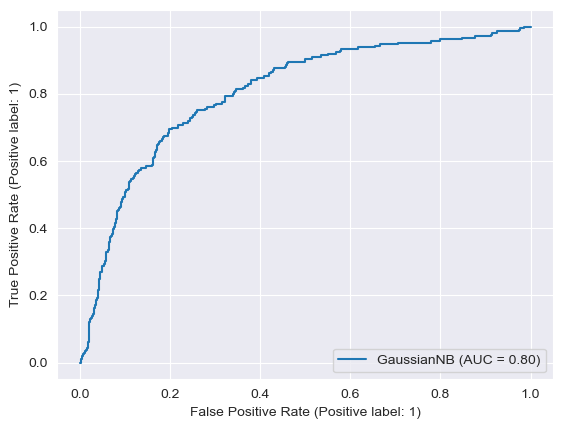

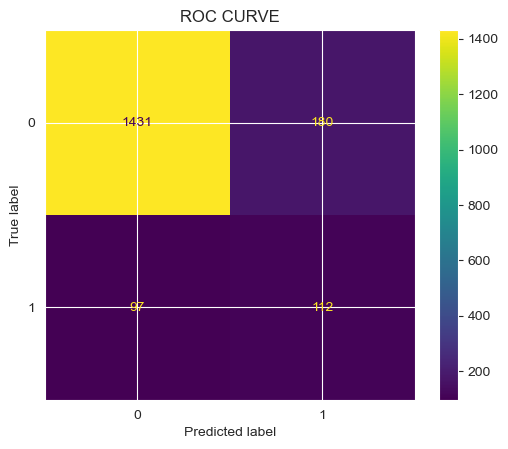

****************
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> __main__
Accuracy: 0.89
Precision: 0.56
Recall: 0.35
F1: 0.43


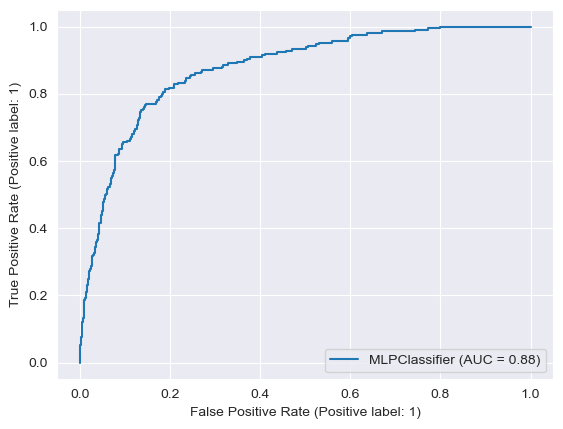

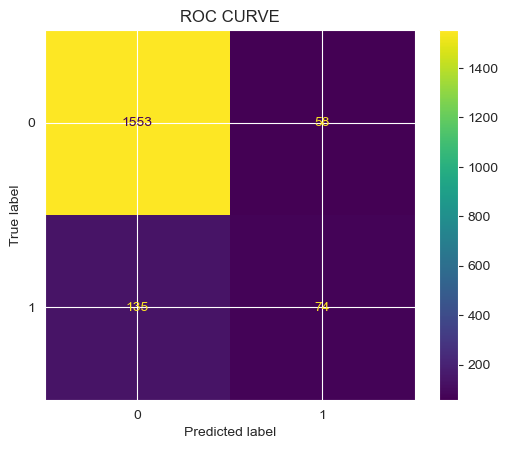

****************
<class 'sklearn.tree._classes.DecisionTreeClassifier'> __main__
Accuracy: 0.9
Precision: 0.66
Recall: 0.32
F1: 0.43


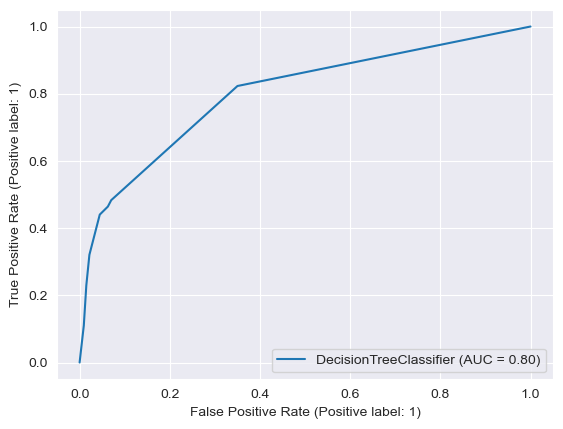

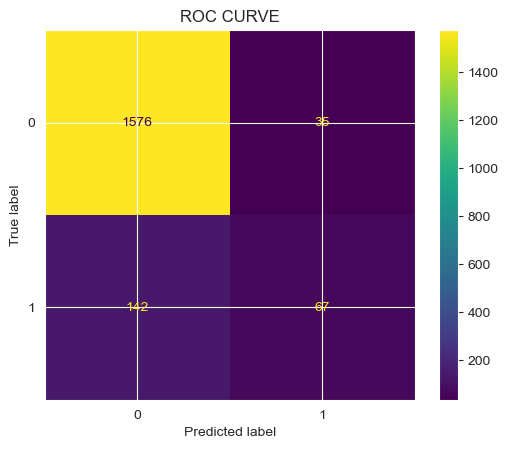

****************
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> __main__
Accuracy: 0.89
Precision: 0.55
Recall: 0.27
F1: 0.37


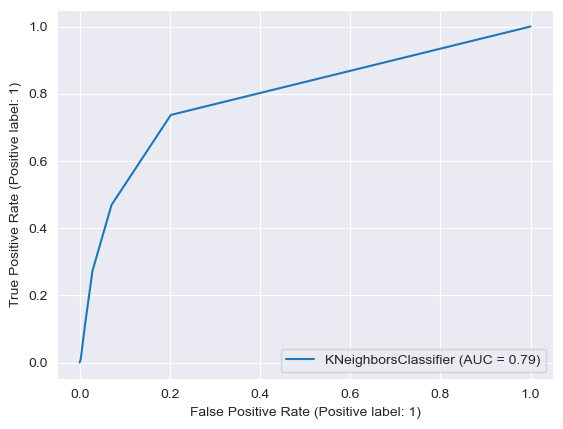

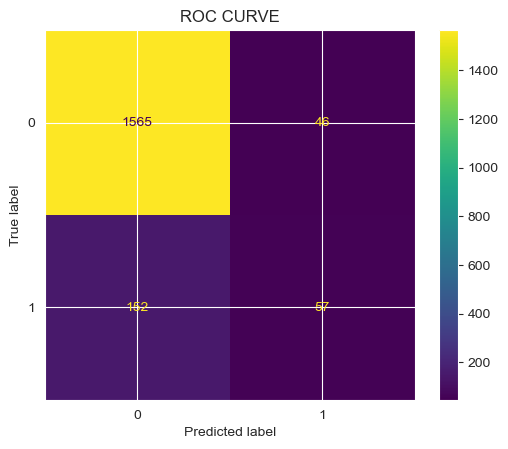

****************
<class 'sklearn.ensemble._forest.RandomForestClassifier'> __main__
Accuracy: 0.9
Precision: 0.66
Recall: 0.33
F1: 0.44


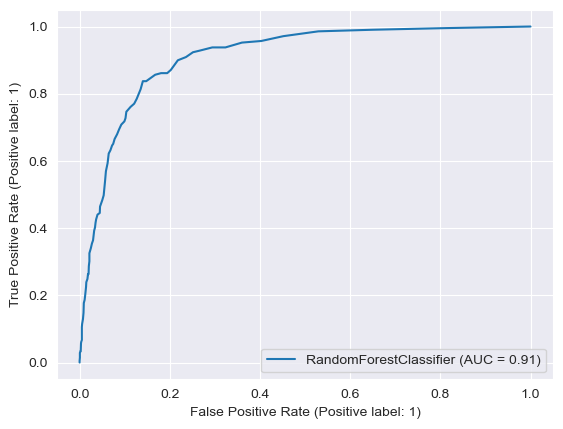

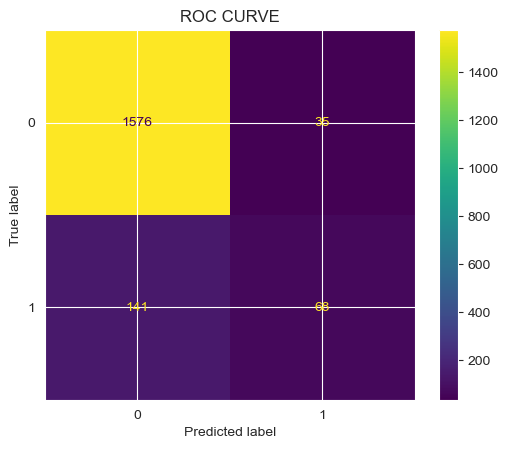

In [447]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,RocCurveDisplay

for clf in (clflr,clfsvm,clfnb,clfmlp,clftree,clfknn,clfrf):
    clf.fit(x_train_set,y_train_set)
    y_pred = clf.predict(x_test_set)
    print("****************")
    print(clf.__class__,__name__)
    print("Accuracy:",accuracy_score(y_test_set,y_pred).round(2))
    print("Precision:",precision_score(y_test_set,y_pred).round(2))
    print("Recall:",recall_score(y_test_set,y_pred).round(2))
    print("F1:",f1_score(y_test_set,y_pred).round(2))
    RocCurveDisplay.from_estimator(clf,x_test_set,y_test_set)
    ConfusionMatrixDisplay.from_estimator(clf,x_test_set,y_test_set)
    plt.title("ROC CURVE")
    plt.show()



## Metricas a usar GridSearchCrossValidation, encontrar os melhores valores ##

In [448]:
from sklearn.model_selection import GridSearchCV

## Grid Search ##

In [453]:

param_grid = {
    'n_estimator' : [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_searchrf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5, scoring='accuracy' , n_jobs=-1)

grid_searchrf.fit(x_train_set,y_train_set)

print("Melhores Hyperparametros:",grid_searchrf.best_params_)

best_modelrf = grid_searchrf.best_estimator_

y_predrf = best_modelrf.predict(x_test_set)

print("Accuracy:",accuracy_score(y_test_set,y_predrf).round(2))
print("Precision:",precision_score(y_test_set,y_predrf).round(2))
print("Recall:",recall_score(y_test_set,y_predrf).round(2))
print("F1:",f1_score(y_test_set,y_predrf).round(2))
RocCurveDisplay.from_estimator(best_modelrf,x_test_set,y_test_set)
plt.title("ROC CURVE GS RandomForest")
ConfusionMatrixDisplay.from_estimator(best_modelrf,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX GS LogisticRegression")
plt.show()


ValueError: Invalid parameter n_estimator for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

## GRID SEARCH Logistic ##

Melhores Hyperparametros: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.89
Precision: 0.55
Recall: 0.21
F1: 0.3


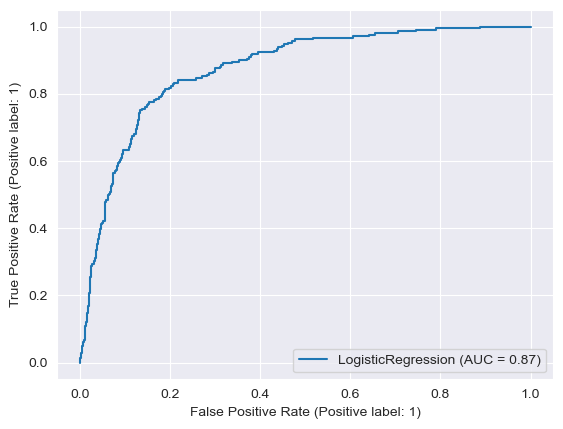

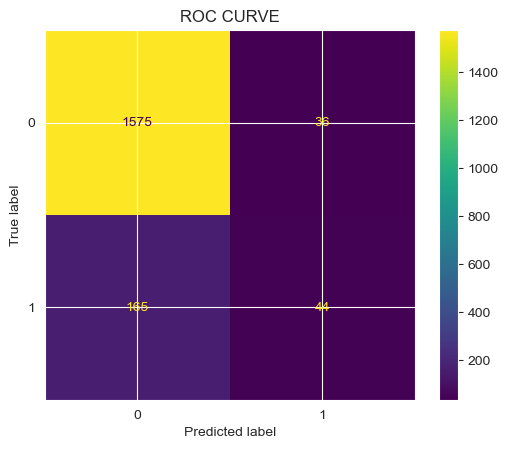

In [451]:
param_grid = {
    'C': [0.1, 1, 5, 10, 20, 30, 50, 80, 100],
    'penalty': ['l1', 'l2']
}


lr = LogisticRegression()
grid_searchlr = GridSearchCV(estimator=lr, param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_searchlr.fit(x_train_set,y_train_set)
print("Melhores Hyperparametros:",grid_searchlr.best_params_)

best_modellr = grid_searchlr.best_estimator_

y_predlr = best_modellr.predict(x_test_set)

print("Accuracy:",accuracy_score(y_test_set,y_predlr).round(2))
print("Precision:",precision_score(y_test_set,y_predlr).round(2))
print("Recall:",recall_score(y_test_set,y_predlr).round(2))
print("F1:",f1_score(y_test_set,y_predlr).round(2))
RocCurveDisplay.from_estimator(best_modellr,x_test_set,y_test_set)
plt.title("ROC CURVE GS LogisticRegression")
ConfusionMatrixDisplay.from_estimator(best_modellr,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX GS LogisticRegression")
plt.show()

## GridSearch MLP ##

Melhores Hyperparametros: {'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001}
Accuracy: 0.89
Precision: 0.55
Recall: 0.21
F1: 0.3


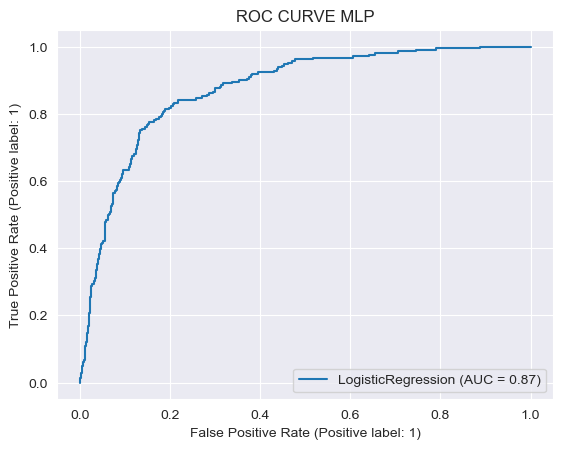

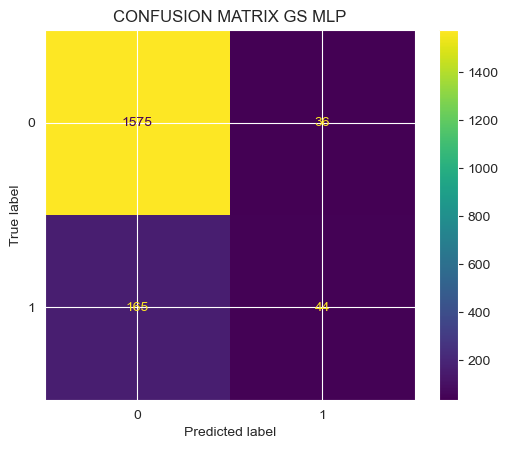

In [455]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}


mlp = MLPClassifier()
grid_searchmlp = GridSearchCV(estimator=mlp, param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_searchmlp.fit(x_train_set,y_train_set)
print("Melhores Hyperparametros:",grid_searchmlp.best_params_)

best_modelmlp = grid_searchlr.best_estimator_

y_predlr = best_modelmlp.predict(x_test_set)

print("Accuracy:",accuracy_score(y_test_set,y_predlr).round(2))
print("Precision:",precision_score(y_test_set,y_predlr).round(2))
print("Recall:",recall_score(y_test_set,y_predlr).round(2))
print("F1:",f1_score(y_test_set,y_predlr).round(2))
RocCurveDisplay.from_estimator(best_modelmlp,x_test_set,y_test_set)
plt.title("ROC CURVE MLP")
ConfusionMatrixDisplay.from_estimator(best_modelmlp,x_test_set,y_test_set)
plt.title("CONFUSION MATRIX GS MLP")
plt.show()

In [ ]:
##FALTA FAZER O VOTING E CORRIR O ALGORITMO LA DE CIMA